<a href="https://colab.research.google.com/github/gatetub/Crypto-buysell-model/blob/main/buysell_model_of_Algorithmic_Crypto_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=a88348719d49ce03eebcae9a22659e4dff62c773f9bb7bfc24c1d6e2b12e4240
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta

In [ ]:
df = pd.read_csv("/content/btc_5m.csv")
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13576.28,13600.00,33.617798
1,2018-01-01 05:35:00,13600.00,13600.00,13501.01,13554.58,40.528679
2,2018-01-01 05:40:00,13554.58,13569.97,13400.01,13556.15,49.469536
3,2018-01-01 05:45:00,13533.75,13547.73,13402.00,13430.52,32.725614
4,2018-01-01 05:50:00,13440.01,13459.99,13410.44,13439.94,26.614135
...,...,...,...,...,...,...
50860,2018-06-28 19:50:00,6115.02,6119.99,6112.06,6119.99,28.189826
50861,2018-06-28 19:55:00,6117.77,6136.10,6117.76,6132.13,93.930960
50862,2018-06-28 20:00:00,6132.02,6136.27,6095.00,6102.52,170.126178
50863,2018-06-28 20:05:00,6102.52,6107.76,6060.59,6086.84,474.683671


In [ ]:
df.describe()

,open,high,low,close,volume
count,50865.000000,50865.000000,50865.000000,50864.000000,50864.000000
mean,9140.209379,9163.016981,9116.276296,9140.128096,121.420510
std,2228.167221,2239.120935,2216.346106,2228.237865,113.308692
min,5769.860000,5800.000000,5750.000000,5767.020000,2.092260
25%,7561.200000,7575.100000,7550.000000,7562.000000,56.455942
50%,8660.000000,8684.000000,8635.000000,8660.000000,88.721980
75%,10234.940000,10270.000000,10201.100000,10234.680000,143.837333
max,17173.970000,17176.240000,17125.000000,17173.970000,1900.495447


In [ ]:
df.info()
#No nunll values exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50865 entries, 0 to 50864
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  50865 non-null  object 
 1   open      50865 non-null  float64
 2   high      50865 non-null  float64
 3   low       50865 non-null  float64
 4   close     50864 non-null  float64
 5   volume    50864 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.3+ MB


In [ ]:
#copying the closing time into a separate dataframe
df2=pd.DataFrame()
df2[["datetime", "close","open"]] = df[["datetime", "close","open"]]
df2

,datetime,close,open
0,2018-01-01 05:30:00,13600.00,13715.65
1,2018-01-01 05:35:00,13554.58,13600.00
2,2018-01-01 05:40:00,13556.15,13554.58
3,2018-01-01 05:45:00,13430.52,13533.75
4,2018-01-01 05:50:00,13439.94,13440.01
...,...,...,...
50860,2018-06-28 19:50:00,6119.99,6115.02
50861,2018-06-28 19:55:00,6132.13,6117.77
50862,2018-06-28 20:00:00,6102.52,6132.02
50863,2018-06-28 20:05:00,6086.84,6102.52


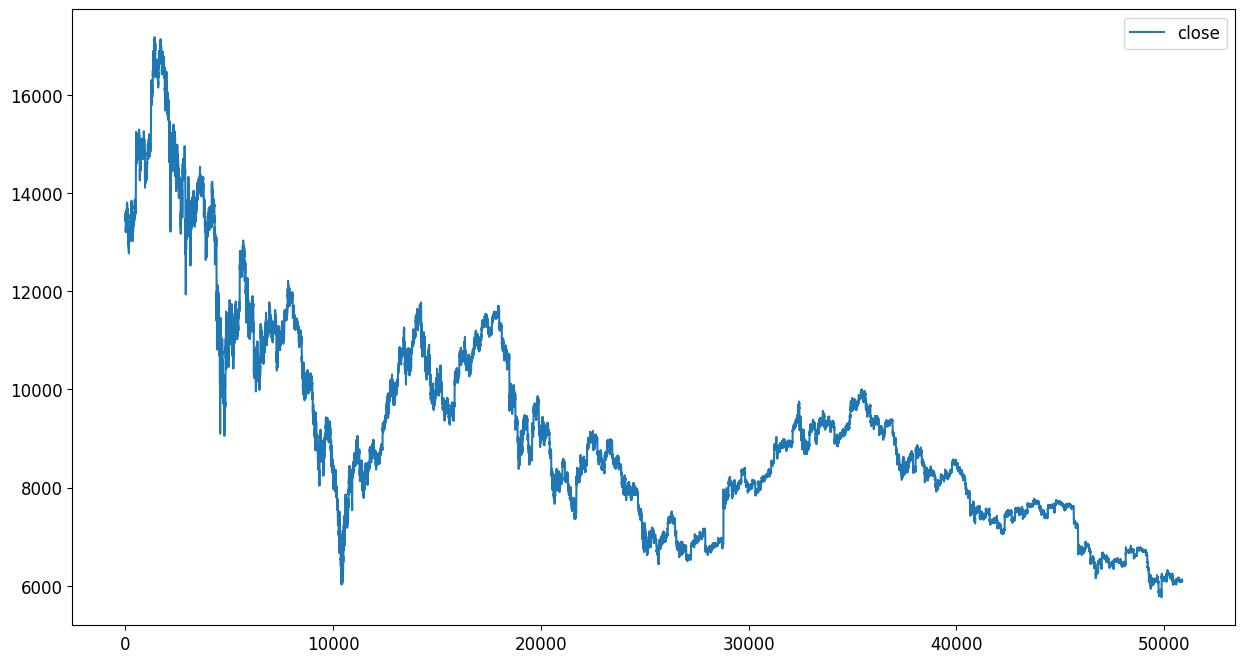

In [ ]:
df2["close"].plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [ ]:
nrml = df2["close"].iloc[0]
nrml

13600.0

In [ ]:
#normalizing closing values
normclose = df2.close.div(nrml).mul(100)
normclose

0        100.000000
1         99.666029
2         99.677574
3         98.753824
4         98.823088
            ...    
50860     44.999926
50861     45.089191
50862     44.871471
50863     44.756176
50864           NaN
Name: close, Length: 50865, dtype: float64

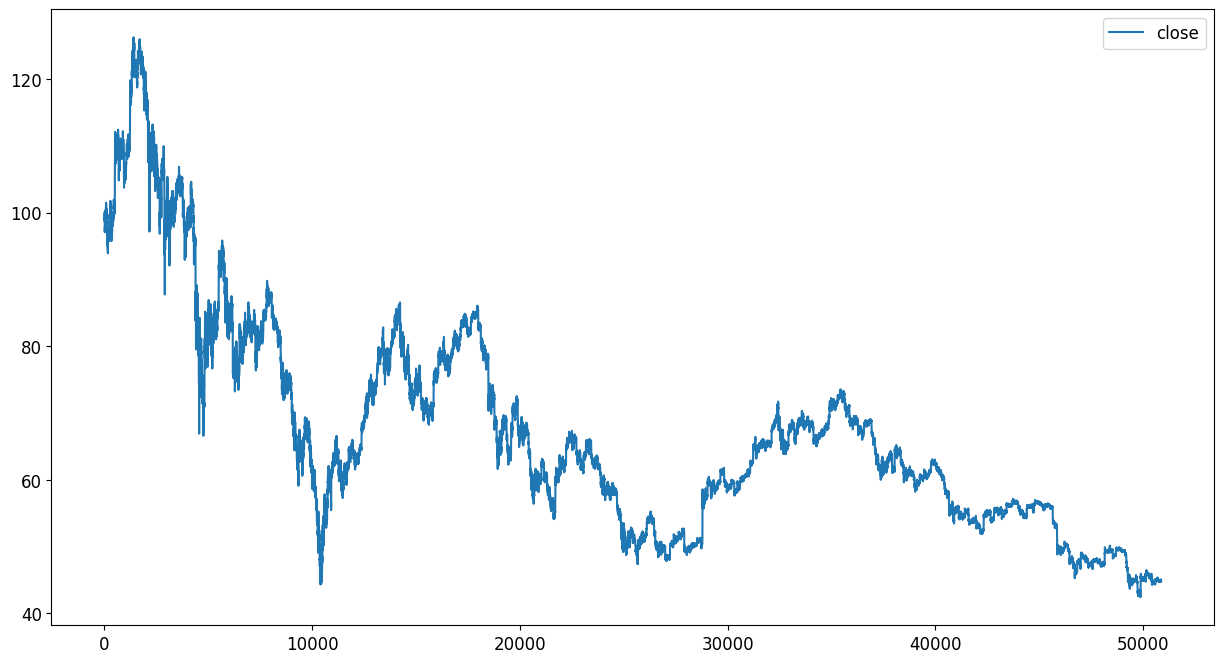

In [ ]:
normclose.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [ ]:
#difference between successive time intervals
df2["Diff"] = df2.close.diff(periods=1)
df2

,datetime,close,open,Diff
0,2018-01-01 05:30:00,13600.00,13715.65,NaN
1,2018-01-01 05:35:00,13554.58,13600.00,-45.42
2,2018-01-01 05:40:00,13556.15,13554.58,1.57
3,2018-01-01 05:45:00,13430.52,13533.75,-125.63
4,2018-01-01 05:50:00,13439.94,13440.01,9.42
...,...,...,...,...
50860,2018-06-28 19:50:00,6119.99,6115.02,4.97
50861,2018-06-28 19:55:00,6132.13,6117.77,12.14
50862,2018-06-28 20:00:00,6102.52,6132.02,-29.61
50863,2018-06-28 20:05:00,6086.84,6102.52,-15.68


In [ ]:
#percentage change over time frame
df2["%change"] = df2.close.pct_change(periods=1).mul(100)
df2

,datetime,close,open,Diff,%change
0,2018-01-01 05:30:00,13600.00,13715.65,NaN,NaN
1,2018-01-01 05:35:00,13554.58,13600.00,-45.42,-0.333971
2,2018-01-01 05:40:00,13556.15,13554.58,1.57,0.011583
3,2018-01-01 05:45:00,13430.52,13533.75,-125.63,-0.926738
4,2018-01-01 05:50:00,13439.94,13440.01,9.42,0.070139
...,...,...,...,...,...
50860,2018-06-28 19:50:00,6119.99,6115.02,4.97,0.081275
50861,2018-06-28 19:55:00,6132.13,6117.77,12.14,0.198366
50862,2018-06-28 20:00:00,6102.52,6132.02,-29.61,-0.482866
50863,2018-06-28 20:05:00,6086.84,6102.52,-15.68,-0.256943


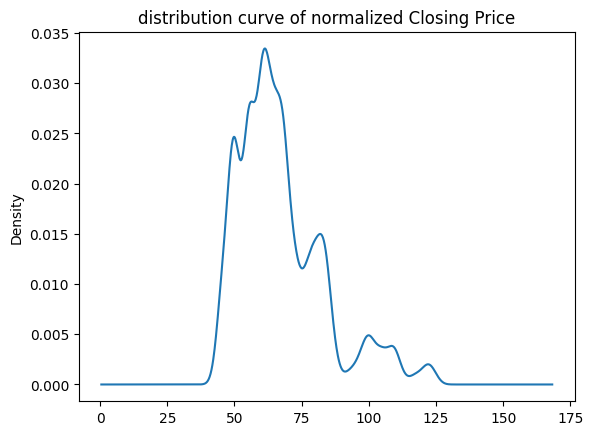

In [ ]:
normclose.plot.kde()
plt.title('distribution curve of normalized Closing Price')
plt.show()

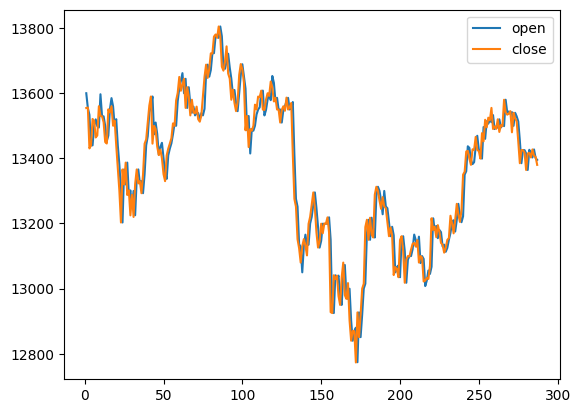

In [ ]:
#graphing open and close of a single day in 5 minute time intervals
df["open"].iloc[1:288].plot()
df["close"].iloc[1:288].plot()
plt.legend()

In [ ]:
#plt.figure(figsize=(15,8))
df3 = df[["datetime","close"]].copy()
df3.set_index("datetime")
df3["datetime"].loc[2]

'2018-01-01 05:40:00'

In [ ]:
# Adding indicators
df2['RSI']=ta.rsi(df2.close, length=15)
df2['EMAF']=ta.ema(df2.close, length=20)
df2['EMAM']=ta.ema(df2.close, length=100)
df2['EMAS']=ta.ema(df2.close, length=150)
df2['Adj_close'] = df2['close'].shift(1)
df2

,datetime,close,open,Diff,%change,RSI,EMAF,EMAM,EMAS,Adj_close
0,2018-01-01 05:30:00,13600.00,13715.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 05:35:00,13554.58,13600.00,-45.42,-0.333971,NaN,NaN,NaN,NaN,13600.00
2,2018-01-01 05:40:00,13556.15,13554.58,1.57,0.011583,NaN,NaN,NaN,NaN,13554.58
3,2018-01-01 05:45:00,13430.52,13533.75,-125.63,-0.926738,NaN,NaN,NaN,NaN,13556.15
4,2018-01-01 05:50:00,13439.94,13440.01,9.42,0.070139,NaN,NaN,NaN,NaN,13430.52
...,...,...,...,...,...,...,...,...,...,...
50860,2018-06-28 19:50:00,6119.99,6115.02,4.97,0.081275,61.900927,6108.802812,6106.974272,6108.315558,6115.02
50861,2018-06-28 19:55:00,6132.13,6117.77,12.14,0.198366,69.057612,6111.024449,6107.472406,6108.630981,6119.99
50862,2018-06-28 20:00:00,6102.52,6132.02,-29.61,-0.482866,46.319855,6110.214501,6107.374338,6108.550041,6132.13
50863,2018-06-28 20:05:00,6086.84,6102.52,-15.68,-0.256943,39.028775,6107.988358,6106.967718,6108.262491,6102.52


In [ ]:
df2['Target'] = df2['Adj_close']-df2['open']
df2['Target'] = df2['Target'].shift(-1)

df2['buy/sell'] = [1 if df2.Target[i]>0 else 0 for i in range(len(df2))]

df2['TargetNextClose'] = df2['Adj_close'].shift(-1)

df2.dropna(inplace=True)
df2.reset_index(inplace = True)

In [ ]:
df2

,index,datetime,close,open,Diff,%change,RSI,EMAF,EMAM,EMAS,Adj_close,Target,buy/sell,TargetNextClose
0,149,2018-01-01 17:55:00,13146.15,13126.00,20.15,0.153512,37.453167,13249.554131,13433.503416,13487.831067,13126.00,-0.66,0,13146.15
1,150,2018-01-01 18:00:00,13199.37,13146.81,53.22,0.404833,42.483154,13244.774690,13428.867111,13484.010390,13146.15,0.00,0,13199.37
2,151,2018-01-01 18:05:00,13170.02,13199.37,-29.35,-0.222359,40.556014,13237.655196,13423.741425,13479.851577,13199.37,-27.95,0,13170.02
3,152,2018-01-01 18:10:00,13200.01,13197.97,29.99,0.227714,43.368474,13234.069939,13419.311100,13476.145066,13170.02,0.00,0,13200.01
4,153,2018-01-01 18:15:00,13198.87,13200.01,-1.14,-0.008636,43.285066,13230.717564,13414.945930,13472.472549,13200.01,0.00,0,13198.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50710,50859,2018-06-28 19:45:00,6115.02,6116.55,-4.60,-0.075168,58.207487,6107.625213,6106.711328,6108.158854,6119.62,0.00,0,6115.02
50711,50860,2018-06-28 19:50:00,6119.99,6115.02,4.97,0.081275,61.900927,6108.802812,6106.974272,6108.315558,6115.02,2.22,1,6119.99
50712,50861,2018-06-28 19:55:00,6132.13,6117.77,12.14,0.198366,69.057612,6111.024449,6107.472406,6108.630981,6119.99,0.11,1,6132.13
50713,50862,2018-06-28 20:00:00,6102.52,6132.02,-29.61,-0.482866,46.319855,6110.214501,6107.374338,6108.550041,6132.13,0.00,0,6102.52


In [ ]:
df2.drop([ 'index', 'datetime'], axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(df2)
print(df2)

          close      open   Diff   %change        RSI          EMAF  \
0      13146.15  13126.00  20.15  0.153512  37.453167  13249.554131   
1      13199.37  13146.81  53.22  0.404833  42.483154  13244.774690   
2      13170.02  13199.37 -29.35 -0.222359  40.556014  13237.655196   
3      13200.01  13197.97  29.99  0.227714  43.368474  13234.069939   
4      13198.87  13200.01  -1.14 -0.008636  43.285066  13230.717564   
...         ...       ...    ...       ...        ...           ...   
50710   6115.02   6116.55  -4.60 -0.075168  58.207487   6107.625213   
50711   6119.99   6115.02   4.97  0.081275  61.900927   6108.802812   
50712   6132.13   6117.77  12.14  0.198366  69.057612   6111.024449   
50713   6102.52   6132.02 -29.61 -0.482866  46.319855   6110.214501   
50714   6086.84   6102.52 -15.68 -0.256943  39.028775   6107.988358   

               EMAM          EMAS  Adj_close  Target  buy/sell  \
0      13433.503416  13487.831067   13126.00   -0.66         0   
1      13428.86

In [ ]:
len(data_set_scaled)

50715

In [ ]:
X = []

#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))


print(X.shape)

print(y.shape)

(50685, 30, 4)
(50685, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

40548
(40548, 30, 4)
(10137, 30, 4)
(40548, 1)
(10137, 1)
[[0.65261704]
 [0.6472291 ]
 [0.65317197]
 ...
 [0.16507305]
 [0.16336707]
 [0.15893731]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)
lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()


In [ ]:

model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
2433/2433 [==============================] - 82s 32ms/step - loss: 2.0964e-04 - val_loss: 2.8707e-06
Epoch 2/30
2433/2433 [==============================] - 72s 30ms/step - loss: 2.9514e-05 - val_loss: 3.4577e-06
Epoch 3/30
2433/2433 [==============================] - 75s 31ms/step - loss: 2.6774e-05 - val_loss: 9.1613e-06
Epoch 4/30
2433/2433 [==============================] - 74s 30ms/step - loss: 2.7012e-05 - val_loss: 3.0568e-06
Epoch 5/30
2433/2433 [==============================] - 75s 31ms/step - loss: 2.4395e-05 - val_loss: 4.8212e-06
Epoch 6/30
2433/2433 [==============================] - 72s 29ms/step - loss: 2.4411e-05 - val_loss: 4.9099e-06
Epoch 7/30
2433/2433 [==============================] - 72s 30ms/step - loss: 2.3153e-05 - val_loss: 7.1372e-06
Epoch 8/30
2433/2433 [==============================] - 73s 30ms/step - loss: 2.3615e-05 - val_loss: 1.3534e-05
Epoch 9/30
2433/2433 [==============================] - 69s 28ms/step - loss: 2.2202e-05 - val_loss: 4.7

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

NameError: name 'model' is not defined

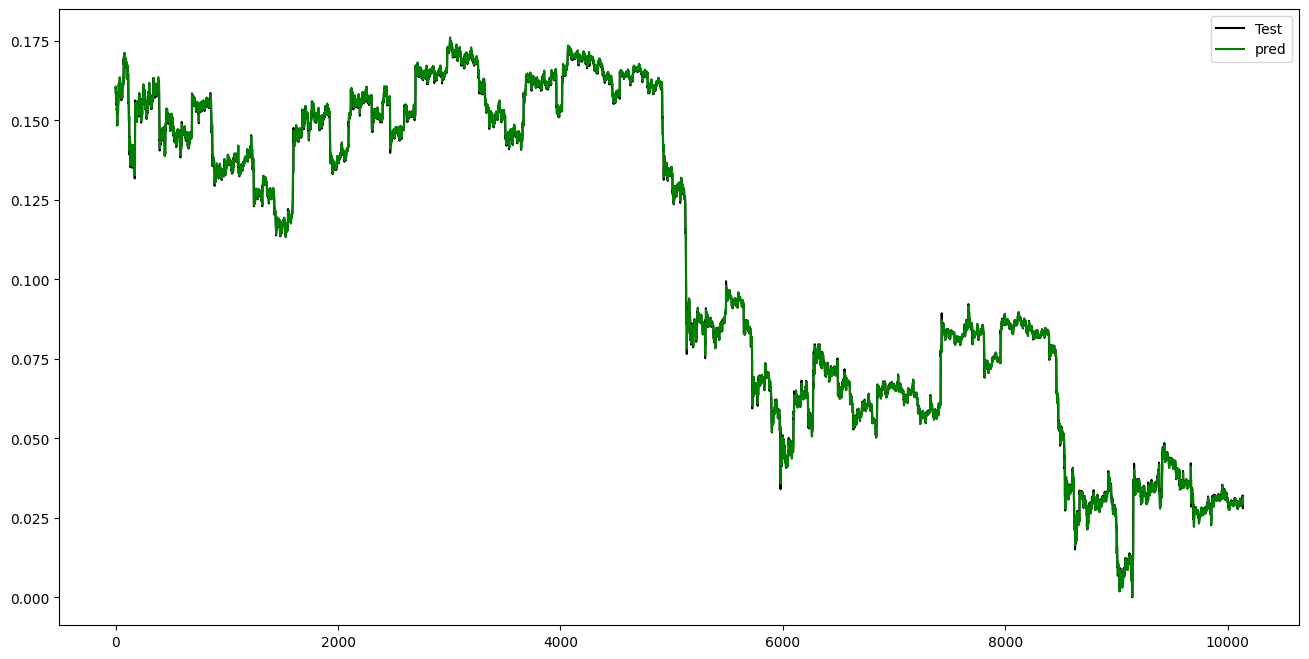

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


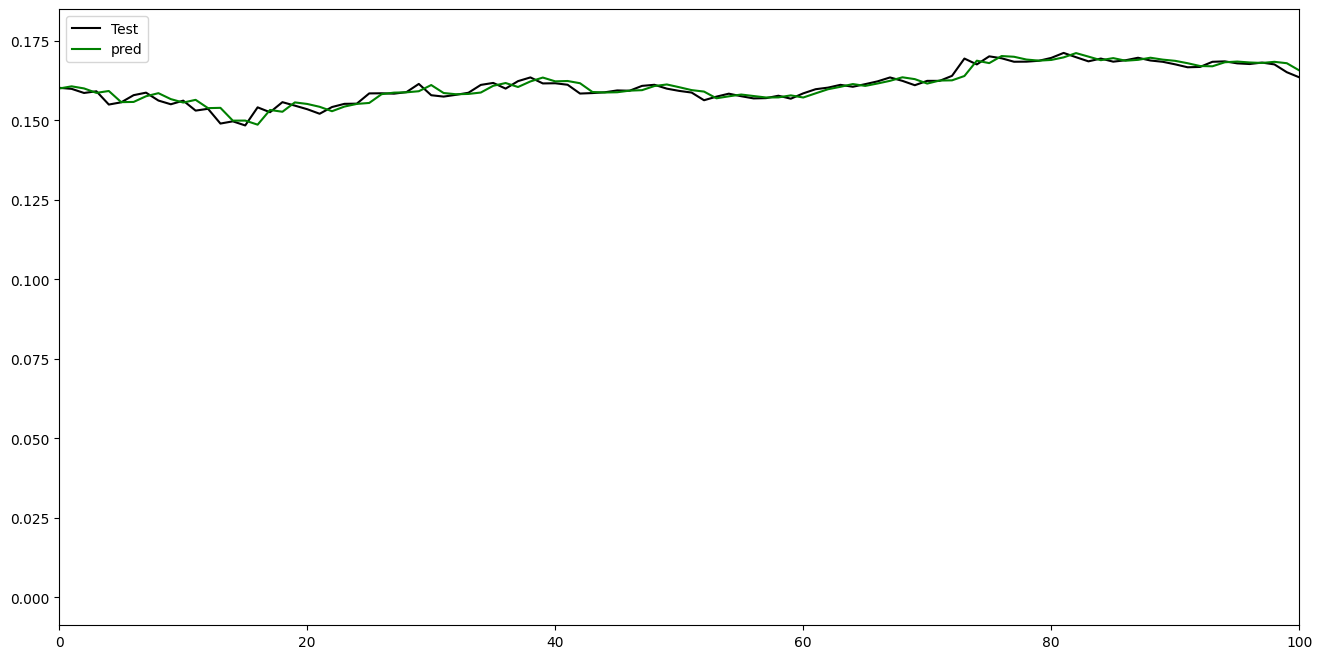

In [ ]:
# prompt: zoom the plot of the above cell

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.xlim([0,100])
plt.show()


In [ ]:
# prompt: mount and save the model using joblib in my drive

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import joblib
import pickle

In [ ]:
joblib.dump(model, 'buysell.joblib')
load_model=joblib.load('buysell.joblib')


NameError: name 'model' is not defined

In [ ]:
# prompt: load model buysell and predict its accuracy

from google.colab import drive
drive.mount('/content/drive')
load_model=joblib.load('/content/drive/MyDrive/model/buysell.joblib')
accuracy = np.mean(np.argmax(load_model.predict(X_test), axis=1) == np.argmax(y_test, axis=1))
print(accuracy)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
317/317 [==============================] - 8s 21ms/step
1.0
